# Resultados del análisis de información para las neuronas analizadas hasta el momento

Hasta el momento se han realizado dos tipos de análisis:
1. Codificación de la presencia del estímulo
2. Codificación de la amplitud

Para ello, se ha separado la base de datos en dos principalmente. Un grupo aisla los ensayos sin estímulo y estímulo táctil mientras que el segundo aisla los conjuntos sin aestímulo y con estímulo acústico.

Los resultados graficados aquí son parte de la base de datos del mono RR032 y en partícular del set de incertidumbre. 

CR: Campo receptor
 1: En el centro 
 2: En los alrededores
 3: Fuera 


Se ha considerado la significancia con p<0.050000000000000044


,CR,"Codifica Presencia T, FR","Codifica amplitud T, FR","Codifica Presencia T, VS","Codifica amplitud T, VS","Codifica Presencia A, FR","Codifica amplitud A, FR","Codifica Presencia A, VS","Codifica amplitud A, VS"
0,1,0.500000,1.000000,0.409091,0.545455,0.0,0.090909,0.045455,0.045455
1,2,0.294118,0.588235,0.235294,0.411765,0.0,0.058824,0.058824,0.000000
2,3,0.117647,0.176471,0.117647,0.058824,0.0,0.000000,0.117647,0.058824


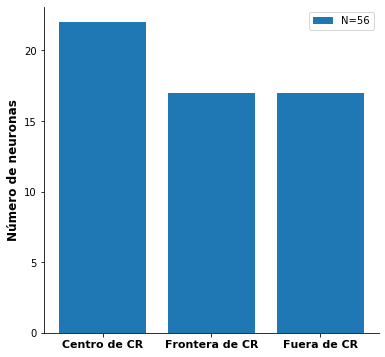

In [1]:
from pyexcel_ods import get_data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from os import name
if name=='nt':
    strpath='D:\\Drive_sparra\\RS2\\'
else:
    strpath='/run/media/sparra/AENHA/Drive_sparra/RS2/'
strdataname=strpath + 'Informacion_S1_RR032_SetB.xls'
data=get_data(strdataname)
data=data["Sheet1"]
ncols=len(data[0])
if len(data[-1])==0:
    nrows=len(data)-2
else:
    nrows=len(data)-1
datavalues=np.hstack(data[1::])
datavalues=np.reshape(datavalues, (nrows, ncols))
# El siguiente bloque selecciona y grafica los datos correspondientes al estímulo táctil
#para la información dados dos estados
mask1=datavalues[:, 6]==1 #En centro de campo receptor
mask2=datavalues[:, 6]==2 #En las fronteras del campo receptor
mask3=datavalues[:, 6]>=3 #Fuera del campo receptor
nc1=np.sum(mask1)
nc2=np.sum(mask2)
nc3=np.sum(mask3)
plt.figure(1, figsize=(6, 6))
ax1=plt.subplot(1, 1, 1)
plt.bar([1, 2, 3], [nc1, nc2, nc3], label="N=" + str(nrows))   # /(nc1+nc2+nc3)*100
plt.xticks([1, 2, 3], ["Centro de CR", "Frontera de CR", "Fuera de CR"], fontsize=11, fontweight="bold")
ax1.set_ylabel("Número de neuronas", fontsize=12, fontweight='bold')
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
plt.legend(loc='best', frameon='False', fontsize=10)

# El siguiente bloque muestra el número de unidades con codificación significativa 
sign=0.95
df={'CR':[1, 2, 3], 'Codifica Presencia T, FR':[np.sum(datavalues[mask1, 10]>sign)/nc1, np.sum(datavalues[mask2, 10]>sign)/nc2, 
    np.sum(datavalues[mask3, 10]>sign)/nc3], 'Codifica amplitud T, FR': [np.sum(datavalues[mask1, 12]>sign)/nc1, np.sum(datavalues[mask2, 12]>sign)/nc2,
    np.sum(datavalues[mask3, 12]>sign)/nc3], 'Codifica Presencia T, VS':[np.sum(datavalues[mask1, 14]>sign)/nc1, np.sum(datavalues[mask2, 14]>sign)/nc2, 
    np.sum(datavalues[mask3, 14]>sign)/nc3], 'Codifica amplitud T, VS':[np.sum(datavalues[mask1, 16]>sign)/nc1, np.sum(datavalues[mask2, 16]>sign)/nc2,
    np.sum(datavalues[mask3, 16]>sign)/nc3], 'Codifica Presencia A, FR':[np.sum(datavalues[mask1, 18]>sign)/nc1, np.sum(datavalues[mask2, 18]>sign)/nc2,
    np.sum(datavalues[mask3, 18]>sign)/nc3], 'Codifica amplitud A, FR':[np.sum(datavalues[mask1, 20]>sign)/nc1, np.sum(datavalues[mask2, 20]>sign)/nc2,
    np.sum(datavalues[mask3, 20]>sign)/nc3], 'Codifica Presencia A, VS':[np.sum(datavalues[mask1, 22]>sign)/nc1, np.sum(datavalues[mask2, 22]>sign)/nc2,
    np.sum(datavalues[mask3, 22]>sign)/nc3], 'Codifica amplitud A, VS':[np.sum(datavalues[mask1, 24]>sign)/nc1, np.sum(datavalues[mask2, 24]>sign)/nc2,
    np.sum(datavalues[mask3, 24]>sign)/nc3]}



print("CR: Campo receptor\n 1: En el centro \n 2: En los alrededores\n 3: Fuera", "\n\n")
print("Se ha considerado la significancia con p<"+str(1-sign))
B=pd.DataFrame(df)
display(B)

Text(0.5, 60.0, 'Información [bits]')

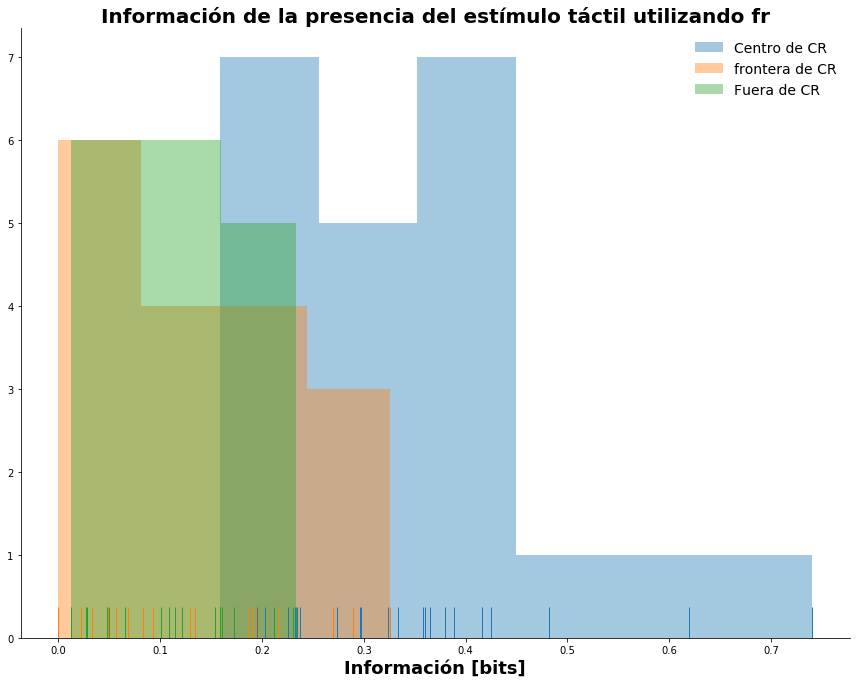

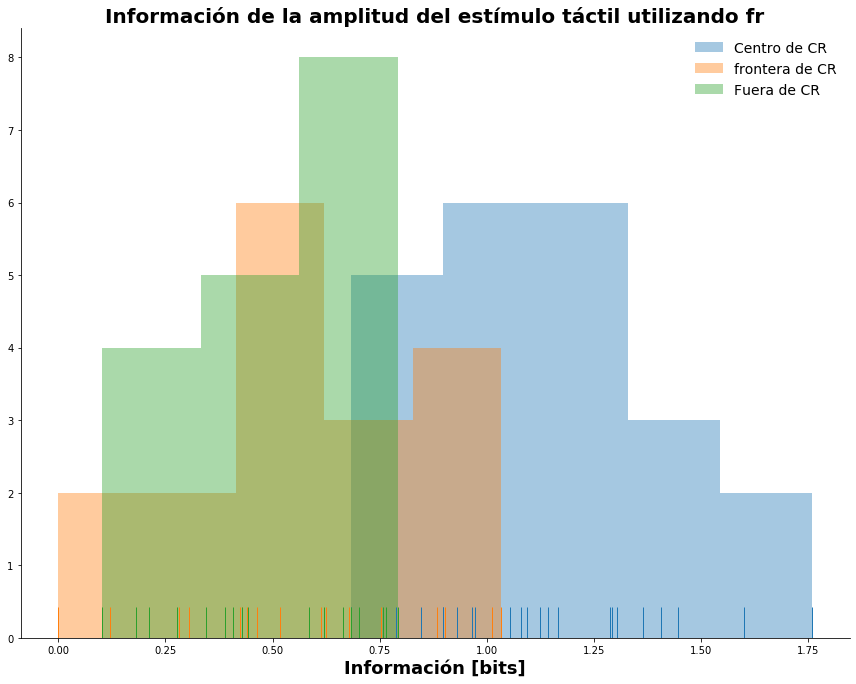

In [2]:

#Gráficas de la codificación del estímulo táctil
plt.figure(figsize=(12, 9))
ax1=plt.subplot(1, 1, 1)
sns.distplot(datavalues[mask1, 9], label='Centro de CR', kde=False, rug=True)
sns.distplot(datavalues[mask2, 9], label='frontera de CR', kde=False, rug=True)
sns.distplot(datavalues[mask3, 9], label="Fuera de CR", kde=False, rug=True)
plt.legend(loc='best', frameon=False, fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.tight_layout()
ax1.set_title("Información de la presencia del estímulo táctil utilizando fr", fontsize=20, fontweight='bold')
ax1.set_xlabel("Información [bits]", fontsize=18, fontweight='bold')

#Gráficas de la codificación del estímulo táctil
plt.figure(figsize=(12, 9))
ax1=plt.subplot(1, 1, 1)
sns.distplot(datavalues[mask1, 11], label='Centro de CR', kde=False, rug=True)
sns.distplot(datavalues[mask2, 11], label='frontera de CR', kde=False, rug=True)
sns.distplot(datavalues[mask3, 11], label="Fuera de CR", kde=False, rug=True)
plt.legend(loc='best', frameon=False, fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.tight_layout()
ax1.set_title("Información de la amplitud del estímulo táctil utilizando fr", fontsize=20, fontweight='bold')
ax1.set_xlabel("Información [bits]", fontsize=18, fontweight='bold')

Text(0.5, 60.0, 'Información [bits]')

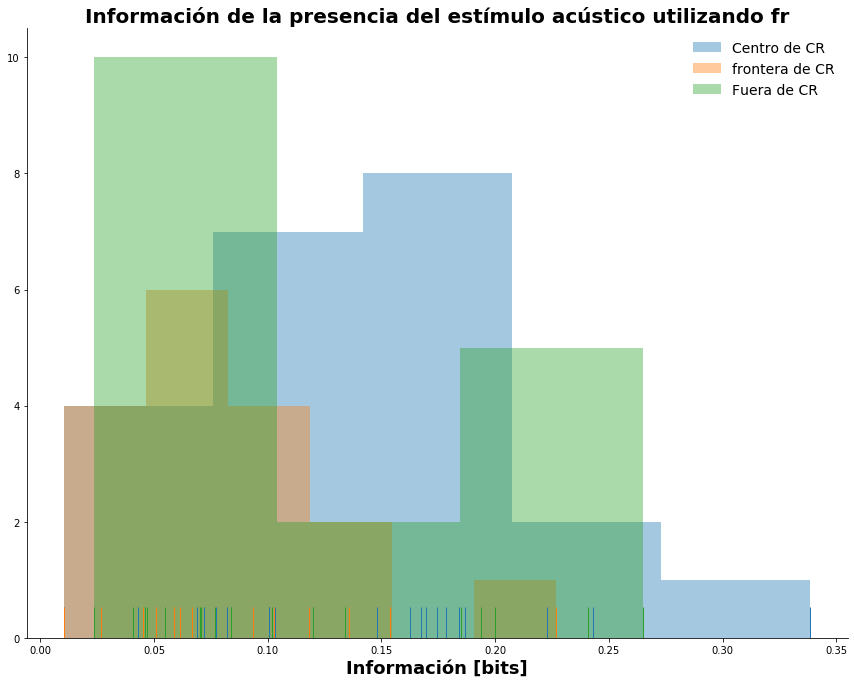

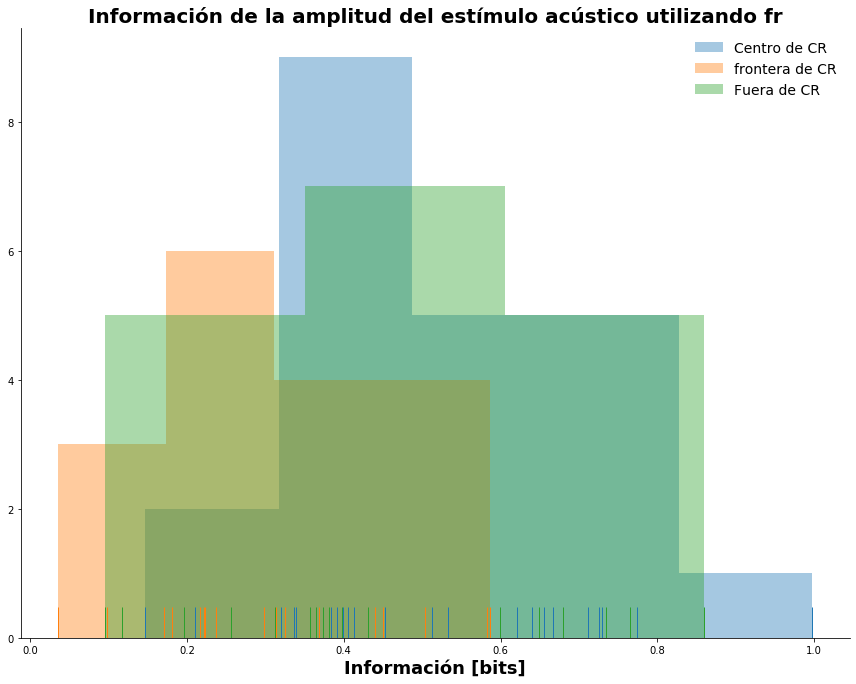

In [3]:
#Gráficas de la codificación del estímulo acústico
plt.figure(figsize=(12, 9))
ax1=plt.subplot(1, 1, 1)
sns.distplot(datavalues[mask1, 19], label='Centro de CR', kde=False, rug=True)
sns.distplot(datavalues[mask2, 19], label='frontera de CR', kde=False, rug=True)
sns.distplot(datavalues[mask3, 19], label="Fuera de CR", kde=False, rug=True)
plt.legend(loc='best', frameon=False, fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.tight_layout()
ax1.set_title("Información de la presencia del estímulo acústico utilizando fr", fontsize=20, fontweight='bold')
ax1.set_xlabel("Información [bits]", fontsize=18, fontweight='bold')

#Gráficas de la codificación del estímulo acústico
plt.figure(figsize=(12, 9))
ax1=plt.subplot(1, 1, 1)
sns.distplot(datavalues[mask1, 21], label='Centro de CR', kde=False, rug=True)
sns.distplot(datavalues[mask2, 21], label='frontera de CR', kde=False, rug=True)
sns.distplot(datavalues[mask3, 21], label="Fuera de CR", kde=False, rug=True)
plt.legend(loc='best', frameon=False, fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.tight_layout()
ax1.set_title("Información de la amplitud del estímulo acústico utilizando fr", fontsize=20, fontweight='bold')
ax1.set_xlabel("Información [bits]", fontsize=18, fontweight='bold')

Los histogramas de arriba mostraban los resultados de información de 46 unidades para la codificación tanto de la presencia del estímulo como de la amplitud del estímulo táctil y auditivo. Dicha codificación se midió utilizando la métrica de tasa de disparo. 

Las gráficas que se mostraran a continuación muestran resultados de un análisis similar pero utilizando la métrica de vector de fuerza, la cual mide el amarramiento de fase en los disparos a la frecuencia de estimulación.

Text(0.5, 60.0, 'Información [bits]')

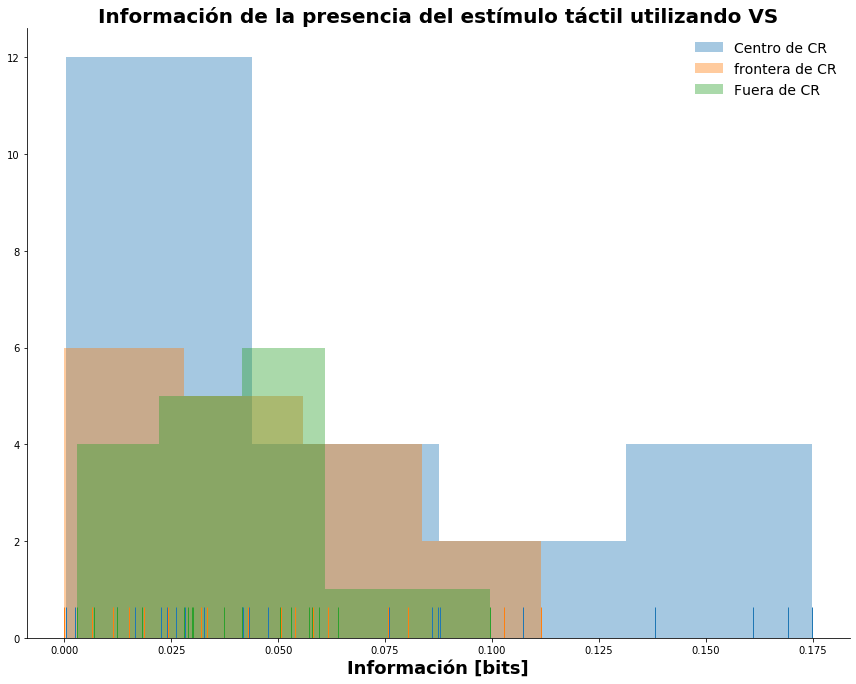

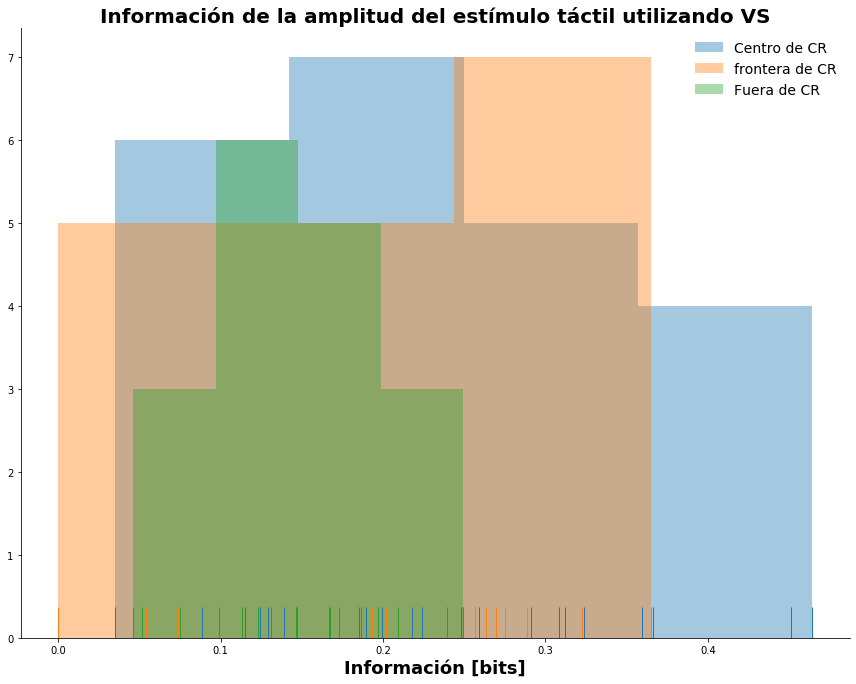

In [4]:
#Gráficas de la codificación del estímulo táctil
plt.figure(figsize=(12, 9))
ax1=plt.subplot(1, 1, 1)
sns.distplot(datavalues[mask1, 13], label='Centro de CR', kde=False, rug=True)
sns.distplot(datavalues[mask2, 13], label='frontera de CR', kde=False, rug=True)
sns.distplot(datavalues[mask3, 13], label="Fuera de CR", kde=False, rug=True)
plt.legend(loc='best', frameon=False, fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.tight_layout()
ax1.set_title("Información de la presencia del estímulo táctil utilizando VS", fontsize=20, fontweight='bold')
ax1.set_xlabel("Información [bits]", fontsize=18, fontweight='bold')

#Gráficas de la codificación de la amplitud del estímulo táctil
plt.figure(figsize=(12, 9))
ax1=plt.subplot(1, 1, 1)
sns.distplot(datavalues[mask1, 15], label='Centro de CR', kde=False, rug=True)
sns.distplot(datavalues[mask2, 15], label='frontera de CR', kde=False, rug=True)
sns.distplot(datavalues[mask3, 15], label="Fuera de CR", kde=False, rug=True)
plt.legend(loc='best', frameon=False, fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.tight_layout()
ax1.set_title("Información de la amplitud del estímulo táctil utilizando VS", fontsize=20, fontweight='bold')
ax1.set_xlabel("Información [bits]", fontsize=18, fontweight='bold')

Text(0.5, 60.0, 'Información [bits]')

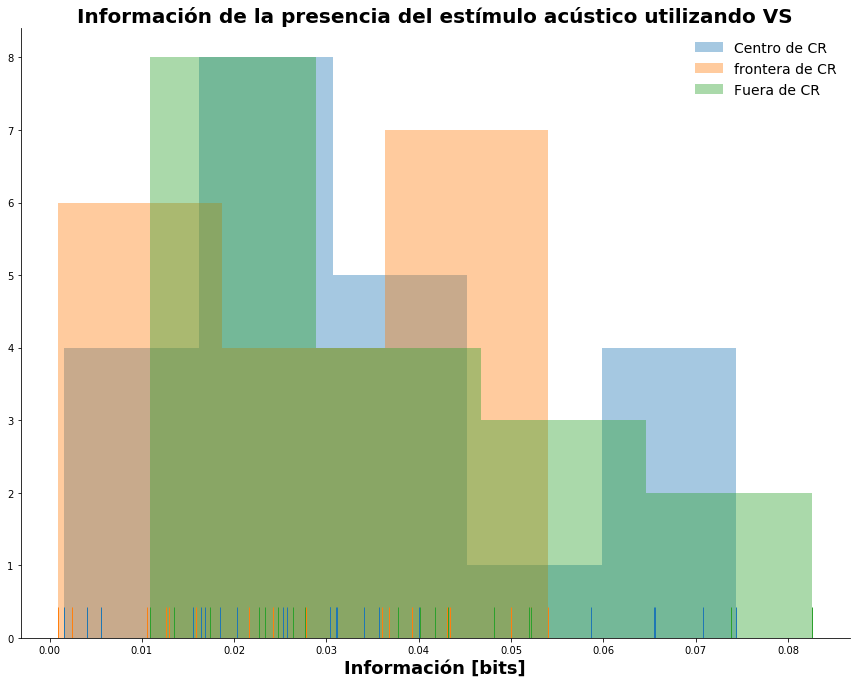

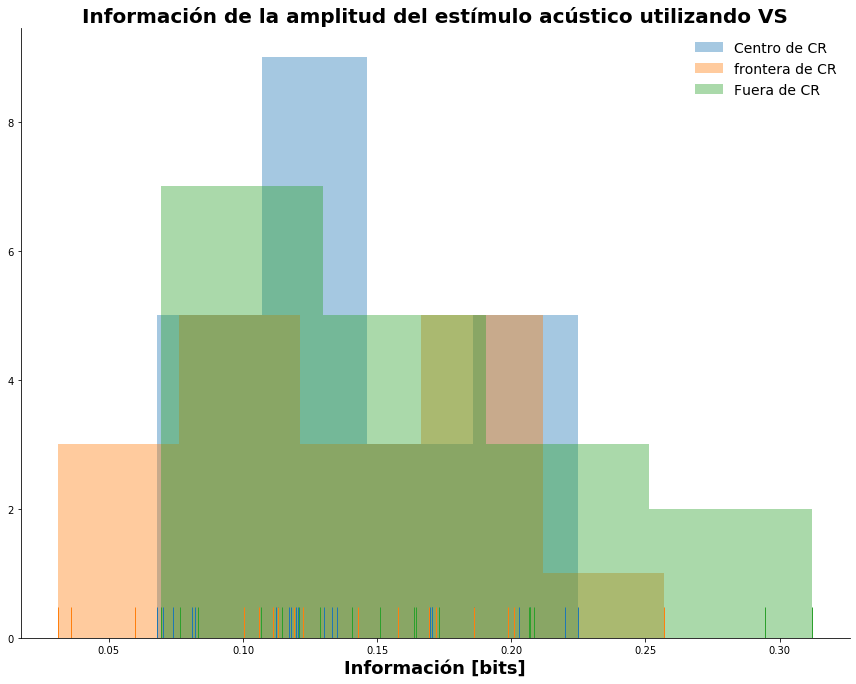

In [5]:
#Gráficas de la codificación del estímulo táctil
plt.figure(figsize=(12, 9))
ax1=plt.subplot(1, 1, 1)
sns.distplot(datavalues[mask1, 23], label='Centro de CR', kde=False, rug=True)
sns.distplot(datavalues[mask2, 23], label='frontera de CR', kde=False, rug=True)
sns.distplot(datavalues[mask3, 23], label="Fuera de CR", kde=False, rug=True)
plt.legend(loc='best', frameon=False, fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.tight_layout()
ax1.set_title("Información de la presencia del estímulo acústico utilizando VS", fontsize=20, fontweight='bold')
ax1.set_xlabel("Información [bits]", fontsize=18, fontweight='bold')

#Gráficas de la codificación del estímulo táctil
plt.figure(figsize=(12, 9))
ax1=plt.subplot(1, 1, 1)
sns.distplot(datavalues[mask1, 25], label='Centro de CR', kde=False, rug=True)
sns.distplot(datavalues[mask2, 25], label='frontera de CR', kde=False, rug=True)
sns.distplot(datavalues[mask3, 25], label="Fuera de CR", kde=False, rug=True)
plt.legend(loc='best', frameon=False, fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.tight_layout()
ax1.set_title("Información de la amplitud del estímulo acústico utilizando VS", fontsize=20, fontweight='bold')
ax1.set_xlabel("Información [bits]", fontsize=18, fontweight='bold')

Las siguientes gráficas muestran las distribuciones en un plot joint con el fin de realizar una mejor comparación en la codificación para las diversas métricas. La primera comparación refiere a la codificación por medio de las diversas métricas.

Text(0.5, 1.0, 'Codificación de la presencia del estímulo acústico')

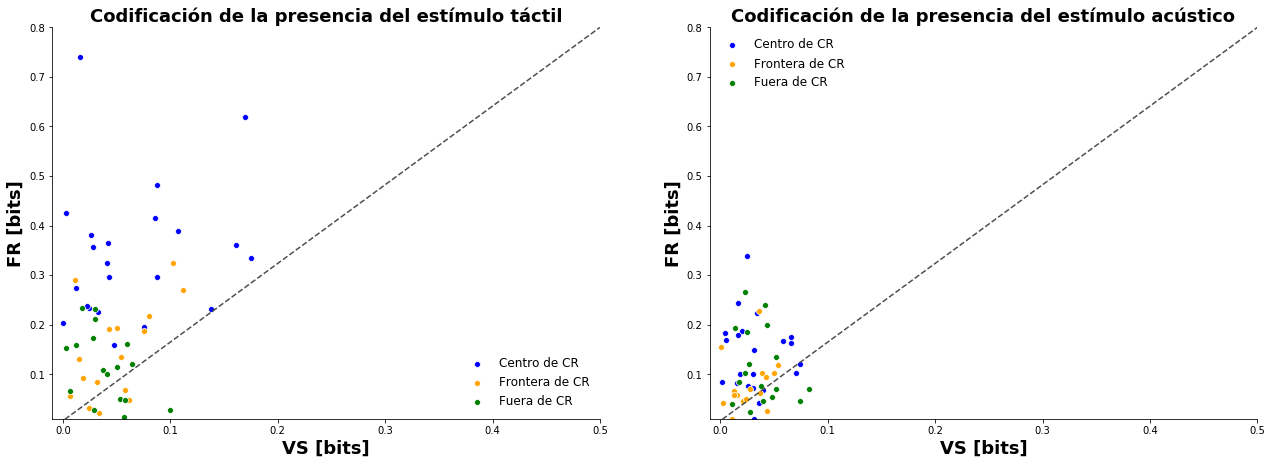

In [6]:
plt.figure(figsize=(18*1.2, 6*1.2))
ax1=plt.subplot(1, 2, 1)
sns.scatterplot(datavalues[mask1, 13], datavalues[mask1, 9], color='blue', ax=ax1, label="Centro de CR")
sns.scatterplot(datavalues[mask2, 13], datavalues[mask2, 9], color='orange', ax=ax1, label="Frontera de CR")
sns.scatterplot(datavalues[mask3, 13], datavalues[mask3, 9], color='green', ax=ax1, label="Fuera de CR")
ax1.set(xlim=(-0.01, 0.5), ylim=(0.01, 0.8))
ax1.plot([-0.01, 0.5], [-0.01, 0.8], ls="--", c=".3")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel("VS [bits]", fontsize=18, fontweight='bold')
ax1.set_ylabel("FR [bits]", fontsize=18, fontweight='bold')
plt.legend(loc='best', frameon=False, fontsize=12)
ax1.set_title("Codificación de la presencia del estímulo táctil", fontsize=18, fontweight='bold')


ax2=plt.subplot(1, 2, 2)
sns.scatterplot(datavalues[mask1, 23], datavalues[mask1, 19], color='blue', ax=ax2, label="Centro de CR")
sns.scatterplot(datavalues[mask2, 23], datavalues[mask2, 19], color='orange', ax=ax2, label="Frontera de CR")
sns.scatterplot(datavalues[mask3, 23], datavalues[mask3, 19], color='green', ax=ax2, label="Fuera de CR")
ax2.set(xlim=(-0.01, 0.5), ylim=(0.01, 0.8))
ax2.plot([-0.01, 0.5], [-0.01, 0.8], ls="--", c=".3")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xlabel("VS [bits]", fontsize=18, fontweight='bold')
ax2.set_ylabel("FR [bits]", fontsize=18, fontweight='bold')
plt.legend(loc='best', frameon=False, fontsize=12)
ax2.set_title("Codificación de la presencia del estímulo acústico", fontsize=18, fontweight='bold')




Text(0.5, 1.0, 'Codificación de la amplitud del estímulo acústico')

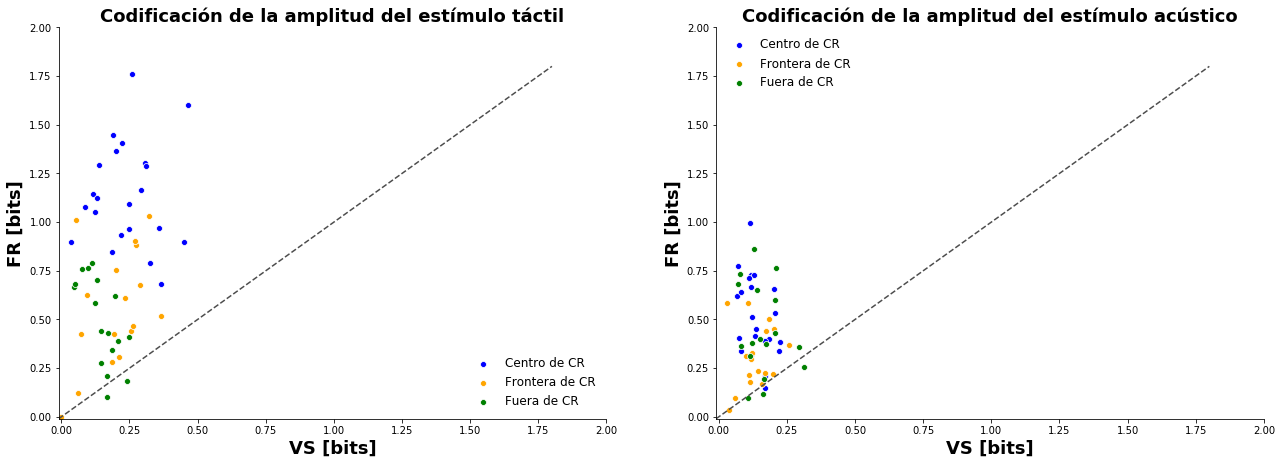

In [7]:
plt.figure(figsize=(18*1.2, 6*1.2))
ax1=plt.subplot(1, 2, 1)
sns.scatterplot(datavalues[mask1, 15], datavalues[mask1, 11], color='blue', ax=ax1, label="Centro de CR")
sns.scatterplot(datavalues[mask2, 15], datavalues[mask2, 11], color='orange', ax=ax1, label="Frontera de CR")
sns.scatterplot(datavalues[mask3, 15], datavalues[mask3, 11], color='green', ax=ax1, label="Fuera de CR")
ax1.set(xlim=(-0.01, 2), ylim=(-0.01, 2))
ax1.plot([-0.01, 1.8], [-0.01, 1.8], ls="--", c=".3")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel("VS [bits]", fontsize=18, fontweight='bold')
ax1.set_ylabel("FR [bits]", fontsize=18, fontweight='bold')
plt.legend(loc='best', frameon=False, fontsize=12)
ax1.set_title("Codificación de la amplitud del estímulo táctil", fontsize=18, fontweight='bold')


ax2=plt.subplot(1, 2, 2)
sns.scatterplot(datavalues[mask1, 25], datavalues[mask1, 21], color='blue', ax=ax2, label="Centro de CR")
sns.scatterplot(datavalues[mask2, 25], datavalues[mask2, 21], color='orange', ax=ax2, label="Frontera de CR")
sns.scatterplot(datavalues[mask3, 25], datavalues[mask3, 21], color='green', ax=ax2, label="Fuera de CR")
ax2.set(xlim=(-0.01, 2), ylim=(-0.01, 2))
ax2.plot([-0.01, 1.8], [-0.01, 1.8], ls="--", c=".3")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xlabel("VS [bits]", fontsize=18, fontweight='bold')
ax2.set_ylabel("FR [bits]", fontsize=18, fontweight='bold')
plt.legend(loc='best', frameon=False, fontsize=12)
ax2.set_title("Codificación de la amplitud del estímulo acústico", fontsize=18, fontweight='bold')

Como es posible notar, la tasa muestra una mejor codificación que el amarre de fase tanto en la presencia como en la amplitud para de ambas modalidades. Es de resaltar que las distribuciones de la codificación tanto de la presencia como de la amplitud del estímulo acústico son comparables en los tres tipos de campo receptor y la significancia es muy baja.


Las distribuciones en cuanto a la significancia se muestran a continuación:

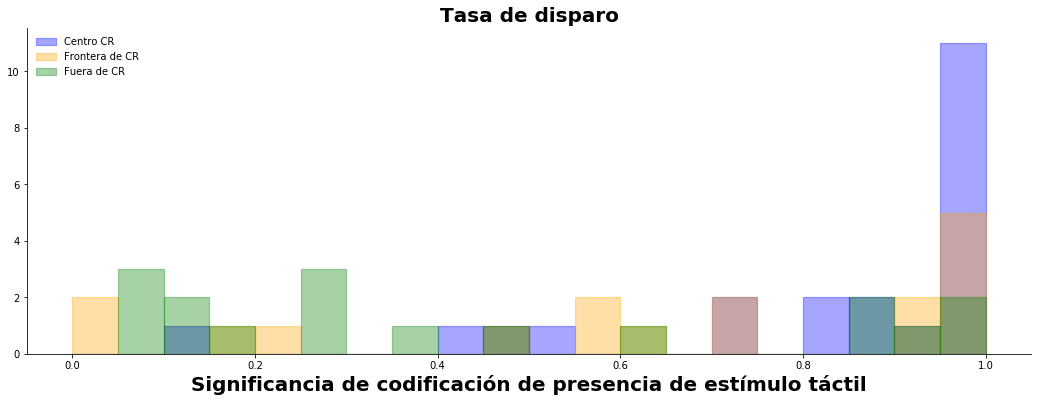

In [8]:
plt.figure(figsize=(18, 6))
ax1=plt.subplot(1,1,1)
bins=np.arange(0, 1.05, 0.05)
ax1.hist(datavalues[mask1, 10], edgecolor='blue', color='blue',linewidth=1.2, bins=bins, alpha=0.35, label='Centro CR')
ax1.hist(datavalues[mask2, 10], edgecolor='orange', color='orange',linewidth=1.2, bins=bins, alpha=0.35, label="Frontera de CR")
ax1.hist(datavalues[mask3, 10], edgecolor='green', color='green',linewidth=1.2, bins=bins, alpha=0.35, label="Fuera de CR")
ax1.set_xlabel("Significancia de codificación de presencia de estímulo táctil", fontweight='bold', fontsize=20)
ax1.set_title("Tasa de disparo", fontweight='bold', fontsize=20)
plt.legend(loc='best', fontsize=10, frameon=False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
#ax1.axvspan(xmin=0.95, xmax=1, facecolor='gray', edgecolor='gray', alpha=0.3)

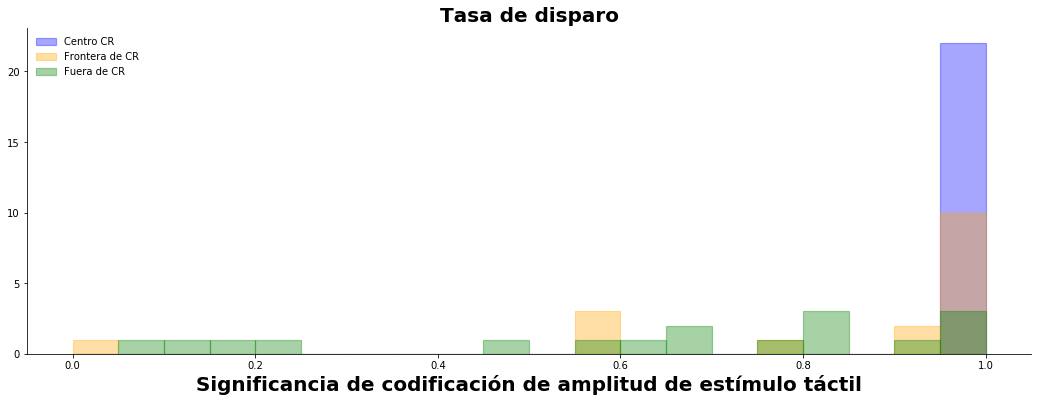

In [9]:
plt.figure(figsize=(18, 6))
ax1=plt.subplot(1,1,1)
bins=np.arange(0, 1.05, 0.05)
ax1.hist(datavalues[mask1, 12], edgecolor='blue', color='blue',linewidth=1.2, bins=bins, alpha=0.35, label='Centro CR')
ax1.hist(datavalues[mask2, 12], edgecolor='orange', color='orange',linewidth=1.2, bins=bins, alpha=0.35, label="Frontera de CR")
ax1.hist(datavalues[mask3, 12], edgecolor='green', color='green',linewidth=1.2, bins=bins, alpha=0.35, label="Fuera de CR")
ax1.set_xlabel("Significancia de codificación de amplitud de estímulo táctil", fontweight='bold', fontsize=20)
ax1.set_title("Tasa de disparo", fontweight='bold', fontsize=20)
plt.legend(loc='best', fontsize=10, frameon=False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
#ax1.axvspan(xmin=0.95, xmax=1, facecolor='gray', edgecolor='gray', alpha=0.3)

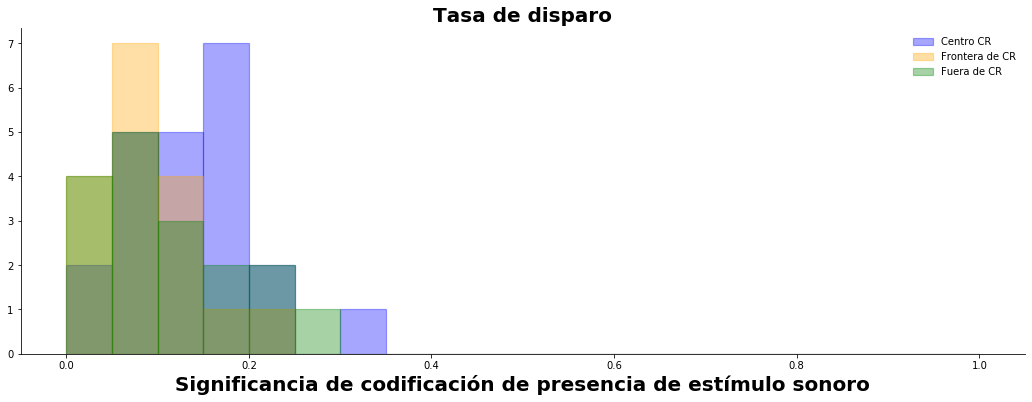

In [10]:
plt.figure(figsize=(18, 6))
ax1=plt.subplot(1,1,1)
bins=np.arange(0, 1.05, 0.05)
ax1.hist(datavalues[mask1, 19], edgecolor='blue', color='blue',linewidth=1.2, bins=bins, alpha=0.35, label='Centro CR')
ax1.hist(datavalues[mask2, 19], edgecolor='orange', color='orange',linewidth=1.2, bins=bins, alpha=0.35, label="Frontera de CR")
ax1.hist(datavalues[mask3, 19], edgecolor='green', color='green',linewidth=1.2, bins=bins, alpha=0.35, label="Fuera de CR")
ax1.set_xlabel("Significancia de codificación de presencia de estímulo sonoro", fontweight='bold', fontsize=20)
ax1.set_title("Tasa de disparo", fontweight='bold', fontsize=20)
plt.legend(loc='best', fontsize=10, frameon=False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
#ax1.axvspan(xmin=0.95, xmax=1, facecolor='gray', edgecolor='gray', alpha=0.3)

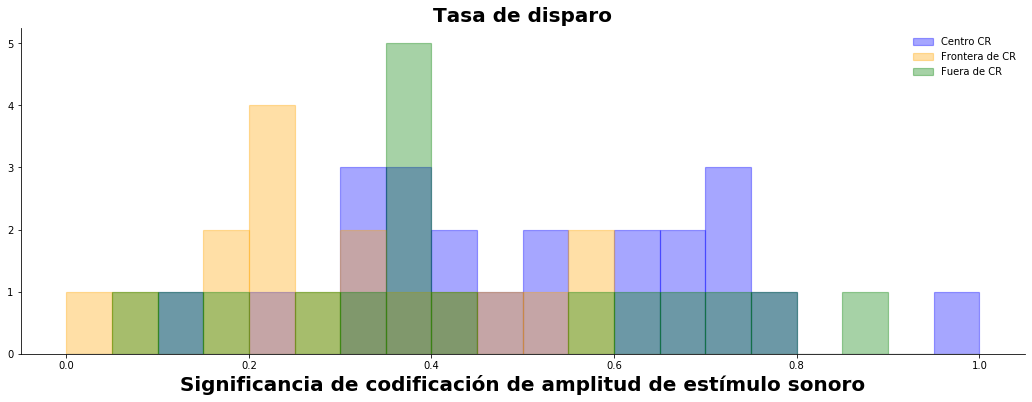

In [11]:
plt.figure(figsize=(18, 6))
ax1=plt.subplot(1,1,1)
bins=np.arange(0, 1.05, 0.05)
ax1.hist(datavalues[mask1, 21], edgecolor='blue', color='blue',linewidth=1.2, bins=bins, alpha=0.35, label='Centro CR')
ax1.hist(datavalues[mask2, 21], edgecolor='orange', color='orange',linewidth=1.2, bins=bins, alpha=0.35, label="Frontera de CR")
ax1.hist(datavalues[mask3, 21], edgecolor='green', color='green',linewidth=1.2, bins=bins, alpha=0.35, label="Fuera de CR")
ax1.set_xlabel("Significancia de codificación de amplitud de estímulo sonoro", fontweight='bold', fontsize=20)
ax1.set_title("Tasa de disparo", fontweight='bold', fontsize=20)
plt.legend(loc='best', fontsize=10, frameon=False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
#ax1.axvspan(xmin=0.95, xmax=1, facecolor='gray', edgecolor='gray', alpha=0.3)

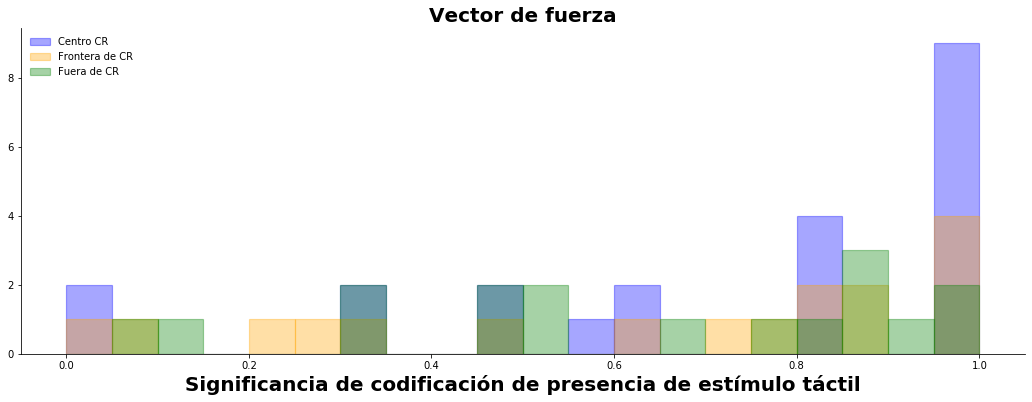

In [12]:
plt.figure(figsize=(18, 6))
ax1=plt.subplot(1,1,1)
bins=np.arange(0, 1.05, 0.05)
ax1.hist(datavalues[mask1, 14], edgecolor='blue', color='blue',linewidth=1.2, bins=bins, alpha=0.35, label='Centro CR')
ax1.hist(datavalues[mask2, 14], edgecolor='orange', color='orange',linewidth=1.2, bins=bins, alpha=0.35, label="Frontera de CR")
ax1.hist(datavalues[mask3, 14], edgecolor='green', color='green',linewidth=1.2, bins=bins, alpha=0.35, label="Fuera de CR")
ax1.set_xlabel("Significancia de codificación de presencia de estímulo táctil", fontweight='bold', fontsize=20)
ax1.set_title("Vector de fuerza", fontweight='bold', fontsize=20)
plt.legend(loc='best', fontsize=10, frameon=False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

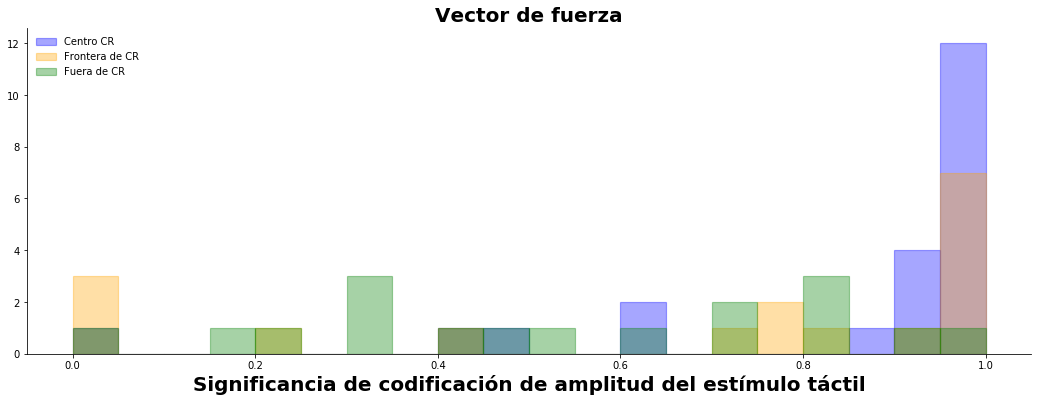

In [13]:
plt.figure(figsize=(18, 6))
ax1=plt.subplot(1,1,1)
bins=np.arange(0, 1.05, 0.05)
ax1.hist(datavalues[mask1, 16], edgecolor='blue', color='blue',linewidth=1.2, bins=bins, alpha=0.35, label='Centro CR')
ax1.hist(datavalues[mask2, 16], edgecolor='orange', color='orange',linewidth=1.2, bins=bins, alpha=0.35, label="Frontera de CR")
ax1.hist(datavalues[mask3, 16], edgecolor='green', color='green',linewidth=1.2, bins=bins, alpha=0.35, label="Fuera de CR")
ax1.set_xlabel("Significancia de codificación de amplitud del estímulo táctil", fontweight='bold', fontsize=20)
ax1.set_title("Vector de fuerza", fontweight='bold', fontsize=20)
plt.legend(loc='best', fontsize=10, frameon=False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

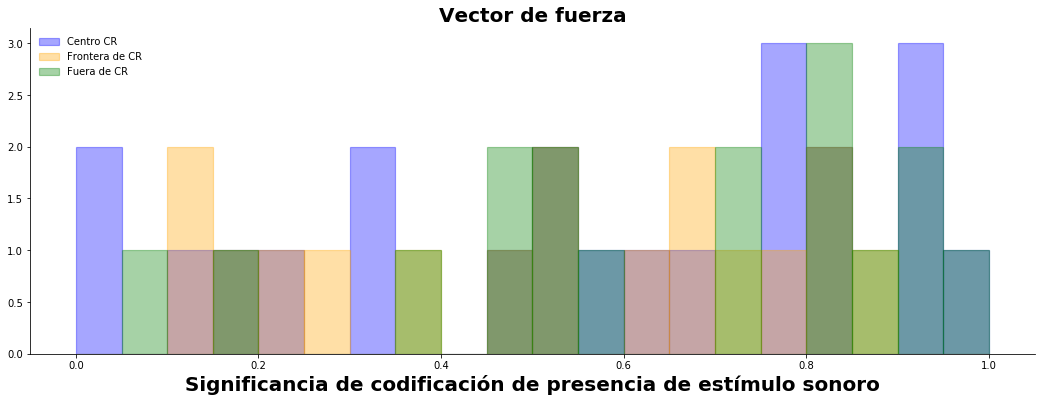

In [14]:
plt.figure(figsize=(18, 6))
ax1=plt.subplot(1,1,1)
bins=np.arange(0, 1.05, 0.05)
ax1.hist(datavalues[mask1, 24], edgecolor='blue', color='blue',linewidth=1.2, bins=bins, alpha=0.35, label='Centro CR')
ax1.hist(datavalues[mask2, 24], edgecolor='orange', color='orange',linewidth=1.2, bins=bins, alpha=0.35, label="Frontera de CR")
ax1.hist(datavalues[mask3, 24], edgecolor='green', color='green',linewidth=1.2, bins=bins, alpha=0.35, label="Fuera de CR")
ax1.set_xlabel("Significancia de codificación de presencia de estímulo sonoro", fontweight='bold', fontsize=20)
ax1.set_title("Vector de fuerza", fontweight='bold', fontsize=20)
plt.legend(loc='best', fontsize=10, frameon=False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

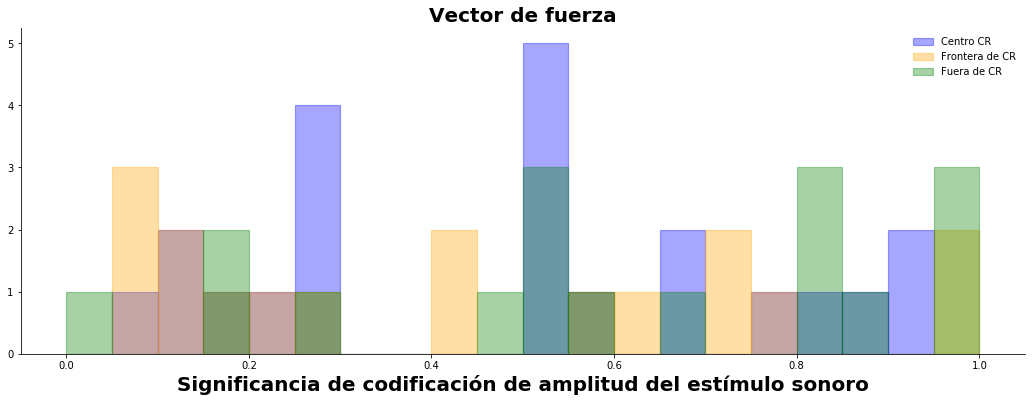

In [15]:
plt.figure(figsize=(18, 6))
ax1=plt.subplot(1,1,1)
bins=np.arange(0, 1.05, 0.05)
ax1.hist(datavalues[mask1, 26], edgecolor='blue', color='blue',linewidth=1.2, bins=bins, alpha=0.35, label='Centro CR')
ax1.hist(datavalues[mask2, 26], edgecolor='orange', color='orange',linewidth=1.2, bins=bins, alpha=0.35, label="Frontera de CR")
ax1.hist(datavalues[mask3, 26], edgecolor='green', color='green',linewidth=1.2, bins=bins, alpha=0.35, label="Fuera de CR")
ax1.set_xlabel("Significancia de codificación de amplitud del estímulo sonoro", fontweight='bold', fontsize=20)
ax1.set_title("Vector de fuerza", fontweight='bold', fontsize=20)
plt.legend(loc='best', fontsize=10, frameon=False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Responsividad de las unidades

In [16]:
# El lugar 8 indica la significancia de responsividad a estímulos táctiles
# El lugar 18 indica la significancia de responsividad a estímulos sonoros
#mask1 1 #En centro de campo receptor
#mask2 2 #En las fronteras del campo receptor
#mask3 3 #Fuera del campo receptor
NR_T_CR1=sum(datavalues[mask1, 8]>0.99)/sum(mask1)*100
NR_T_CR2=sum(datavalues[mask2, 8]>0.99)/sum(mask2)*100
NR_T_CR3=sum(datavalues[mask3, 8]>0.99)/sum(mask3)*100
NR_A_CR1=sum(datavalues[mask1, 18]>0.99)/sum(mask1)*100
NR_A_CR2=sum(datavalues[mask2, 18]>0.99)/sum(mask2)*100
NR_A_CR3=sum(datavalues[mask3, 18]>0.99)/sum(mask3)*100
print("p<0.01: ")
print("CR=1, estímulo táctil: ", NR_T_CR1, "%")
print("CR=2, estímulo táctil: ", NR_T_CR2, "%")
print("CR=3, estímulo táctil: ", NR_T_CR3, "%")
print("CR=1, estímulo sonoro: ", NR_A_CR1, "%")
print("CR=2, estímulo sonoro: ", NR_A_CR2, "%")
print("CR=3, estímulo sonoro: ", NR_A_CR3, "%")
print("---------------------------------------------------------------")
#
NR_T_CR1=sum(datavalues[mask1, 8]>0.95)/sum(mask1)*100
NR_T_CR2=sum(datavalues[mask2, 8]>0.95)/sum(mask2)*100
NR_T_CR3=sum(datavalues[mask3, 8]>0.95)/sum(mask3)*100
NR_A_CR1=sum(datavalues[mask1, 18]>0.95)/sum(mask1)*100
NR_A_CR2=sum(datavalues[mask2, 18]>0.95)/sum(mask2)*100
NR_A_CR3=sum(datavalues[mask3, 18]>0.95)/sum(mask3)*100
print("p<0.05: ")
print("CR=1, estímulo táctil: ", NR_T_CR1, "%")
print("CR=2, estímulo táctil: ", NR_T_CR2, "%")
print("CR=3, estímulo táctil: ", NR_T_CR3, "%")
print("CR=1, estímulo sonoro: ", NR_A_CR1, "%")
print("CR=2, estímulo sonoro: ", NR_A_CR2, "%")
print("CR=3, estímulo sonoro: ", NR_A_CR3, "%")
#
print("---------------------------------------------------------------")
#
NR_T_CR1=sum(datavalues[mask1, 8]>0.9)/sum(mask1)*100
NR_T_CR2=sum(datavalues[mask2, 8]>0.9)/sum(mask2)*100
NR_T_CR3=sum(datavalues[mask3, 8]>0.9)/sum(mask3)*100
NR_A_CR1=sum(datavalues[mask1, 18]>0.9)/sum(mask1)*100
NR_A_CR2=sum(datavalues[mask2, 18]>0.9)/sum(mask2)*100
NR_A_CR3=sum(datavalues[mask3, 18]>0.9)/sum(mask3)*100
print("p<0.1: ")
print("CR=1, estímulo táctil: ", NR_T_CR1, "%")
print("CR=2, estímulo táctil: ", NR_T_CR2, "%")
print("CR=3, estímulo táctil: ", NR_T_CR3, "%")
print("CR=1, estímulo sonoro: ", NR_A_CR1, "%")
print("CR=2, estímulo sonoro: ", NR_A_CR2, "%")
print("CR=3, estímulo sonoro: ", NR_A_CR3, "%")
print("---------------------------------------------------------------")
#
NR_T_CR1=sum(datavalues[mask1, 8]>0.8)/sum(mask1)*100
NR_T_CR2=sum(datavalues[mask2, 8]>0.8)/sum(mask2)*100
NR_T_CR3=sum(datavalues[mask3, 8]>0.8)/sum(mask3)*100
NR_A_CR1=sum(datavalues[mask1, 18]>0.8)/sum(mask1)*100
NR_A_CR2=sum(datavalues[mask2, 18]>0.8)/sum(mask2)*100
NR_A_CR3=sum(datavalues[mask3, 18]>0.8)/sum(mask3)*100
print("p<0.2: ")
print("CR=1, estímulo táctil: ", NR_T_CR1, "%")
print("CR=2, estímulo táctil: ", NR_T_CR2, "%")
print("CR=3, estímulo táctil: ", NR_T_CR3, "%")
print("CR=1, estímulo sonoro: ", NR_A_CR1, "%")
print("CR=2, estímulo sonoro: ", NR_A_CR2, "%")
print("CR=3, estímulo sonoro: ", NR_A_CR3, "%")
print("---------------------------------------------------------------")
#
NR_T_CR1=sum(datavalues[mask1, 8]>0.75)/sum(mask1)*100
NR_T_CR2=sum(datavalues[mask2, 8]>0.75)/sum(mask2)*100
NR_T_CR3=sum(datavalues[mask3, 8]>0.75)/sum(mask3)*100
NR_A_CR1=sum(datavalues[mask1, 18]>0.75)/sum(mask1)*100
NR_A_CR2=sum(datavalues[mask2, 18]>0.75)/sum(mask2)*100
NR_A_CR3=sum(datavalues[mask3, 18]>0.75)/sum(mask3)*100
print("p<0.25: ")
print("CR=1, estímulo táctil: ", NR_T_CR1, "%")
print("CR=2, estímulo táctil: ", NR_T_CR2, "%")
print("CR=3, estímulo táctil: ", NR_T_CR3, "%")
print("CR=1, estímulo sonoro: ", NR_A_CR1, "%")
print("CR=2, estímulo sonoro: ", NR_A_CR2, "%")
print("CR=3, estímulo sonoro: ", NR_A_CR3, "%")

p<0.01: 
CR=1, estímulo táctil:  100.0 %
CR=2, estímulo táctil:  52.94117647058824 %
CR=3, estímulo táctil:  17.647058823529413 %
CR=1, estímulo sonoro:  0.0 %
CR=2, estímulo sonoro:  0.0 %
CR=3, estímulo sonoro:  0.0 %
---------------------------------------------------------------
p<0.05: 
CR=1, estímulo táctil:  100.0 %
CR=2, estímulo táctil:  52.94117647058824 %
CR=3, estímulo táctil:  17.647058823529413 %
CR=1, estímulo sonoro:  0.0 %
CR=2, estímulo sonoro:  0.0 %
CR=3, estímulo sonoro:  0.0 %
---------------------------------------------------------------
p<0.1: 
CR=1, estímulo táctil:  100.0 %
CR=2, estímulo táctil:  58.82352941176471 %
CR=3, estímulo táctil:  23.52941176470588 %
CR=1, estímulo sonoro:  0.0 %
CR=2, estímulo sonoro:  0.0 %
CR=3, estímulo sonoro:  0.0 %
---------------------------------------------------------------
p<0.2: 
CR=1, estímulo táctil:  100.0 %
CR=2, estímulo táctil:  64.70588235294117 %
CR=3, estímulo táctil:  23.52941176470588 %
CR=1, estímulo sonoro:

In [17]:
datavalues=np.hstack(data[1::])
np.shape(datavalues)

(1624,)

In [18]:
data[-2]

[174,
 5,
 1,
 0,
 2,
 3,
 3,
 0.000139,
 0.226,
 0.0281460106385945,
 0.088,
 0.21055136025072801,
 0.558,
 0.0289069124404524,
 0.51,
 0.167455210682272,
 0.706,
 0,
 0,
 0.0467481327110524,
 0.778,
 0.11670889088718801,
 0.157,
 0.0738130501278456,
 0.928,
 0.163844559856989,
 0.66,
 0.001645,
 0.767]